# Exploratory analisys of AirBnB dataset

(SOURCE: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)

## 1. Introduction
(copied directly from SOURCE)

### 1.1. Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
Content

### 1.2. Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
Acknowledgements

### 1.3. Inspiration
This public dataset is part of Airbnb, and the original source can be found on this website.
Inspiration

    What can we learn about different hosts and areas?
    What can we learn from predictions? (ex: locations, prices, reviews, etc)
    Which hosts are the busiest and why?
    Is there any noticeable difference of traffic among different areas and what could be the reason for it?


In [1]:
#import modules

import pandas as pd
import geopandas as gpd
import contextily as ctx #basemap database from https://github.com/geopandas/contextily, master installed directly using winpython control panel
import warnings
import matplotlib.pyplot as plt
#import seaborn as sns
#import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore') #this allow for the supression of deprecation warnings.

In [2]:
#initial dataset

airbnb_ny_dataset = pd.read_csv(r"C:\Users\marma\Desktop\AirBnB_dataset\AB_NYC_2019.csv")
airbnb_ny_dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
airbnb_ny_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_ny_dataset[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
print("Unique values of neighbourhood_group = ", airbnb_ny_dataset["neighbourhood_group"].unique(), "\n\n")

print("Unique values of neighbourhood = ", airbnb_ny_dataset["neighbourhood"].unique(), "\n\n")

print("Unique values of room_type = ", airbnb_ny_dataset["room_type"].unique(), "\n\n")

Unique values of neighbourhood_group =  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 


Unique values of neighbourhood =  ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 

In [6]:
#map the hosts
#airbnb_ny_geodataset = gpd.read_file(r"C:\Users\marma\Desktop\AirBnB_dataset\AB_NYC_2019.csv")

airbnb_ny_geodataset = gpd.GeoDataFrame(airbnb_ny_dataset, crs={'init': 'epsg:4326'}, geometry=gpd.points_from_xy(airbnb_ny_dataset.longitude, airbnb_ny_dataset.latitude))

#airbnb_ny_dataset.columns

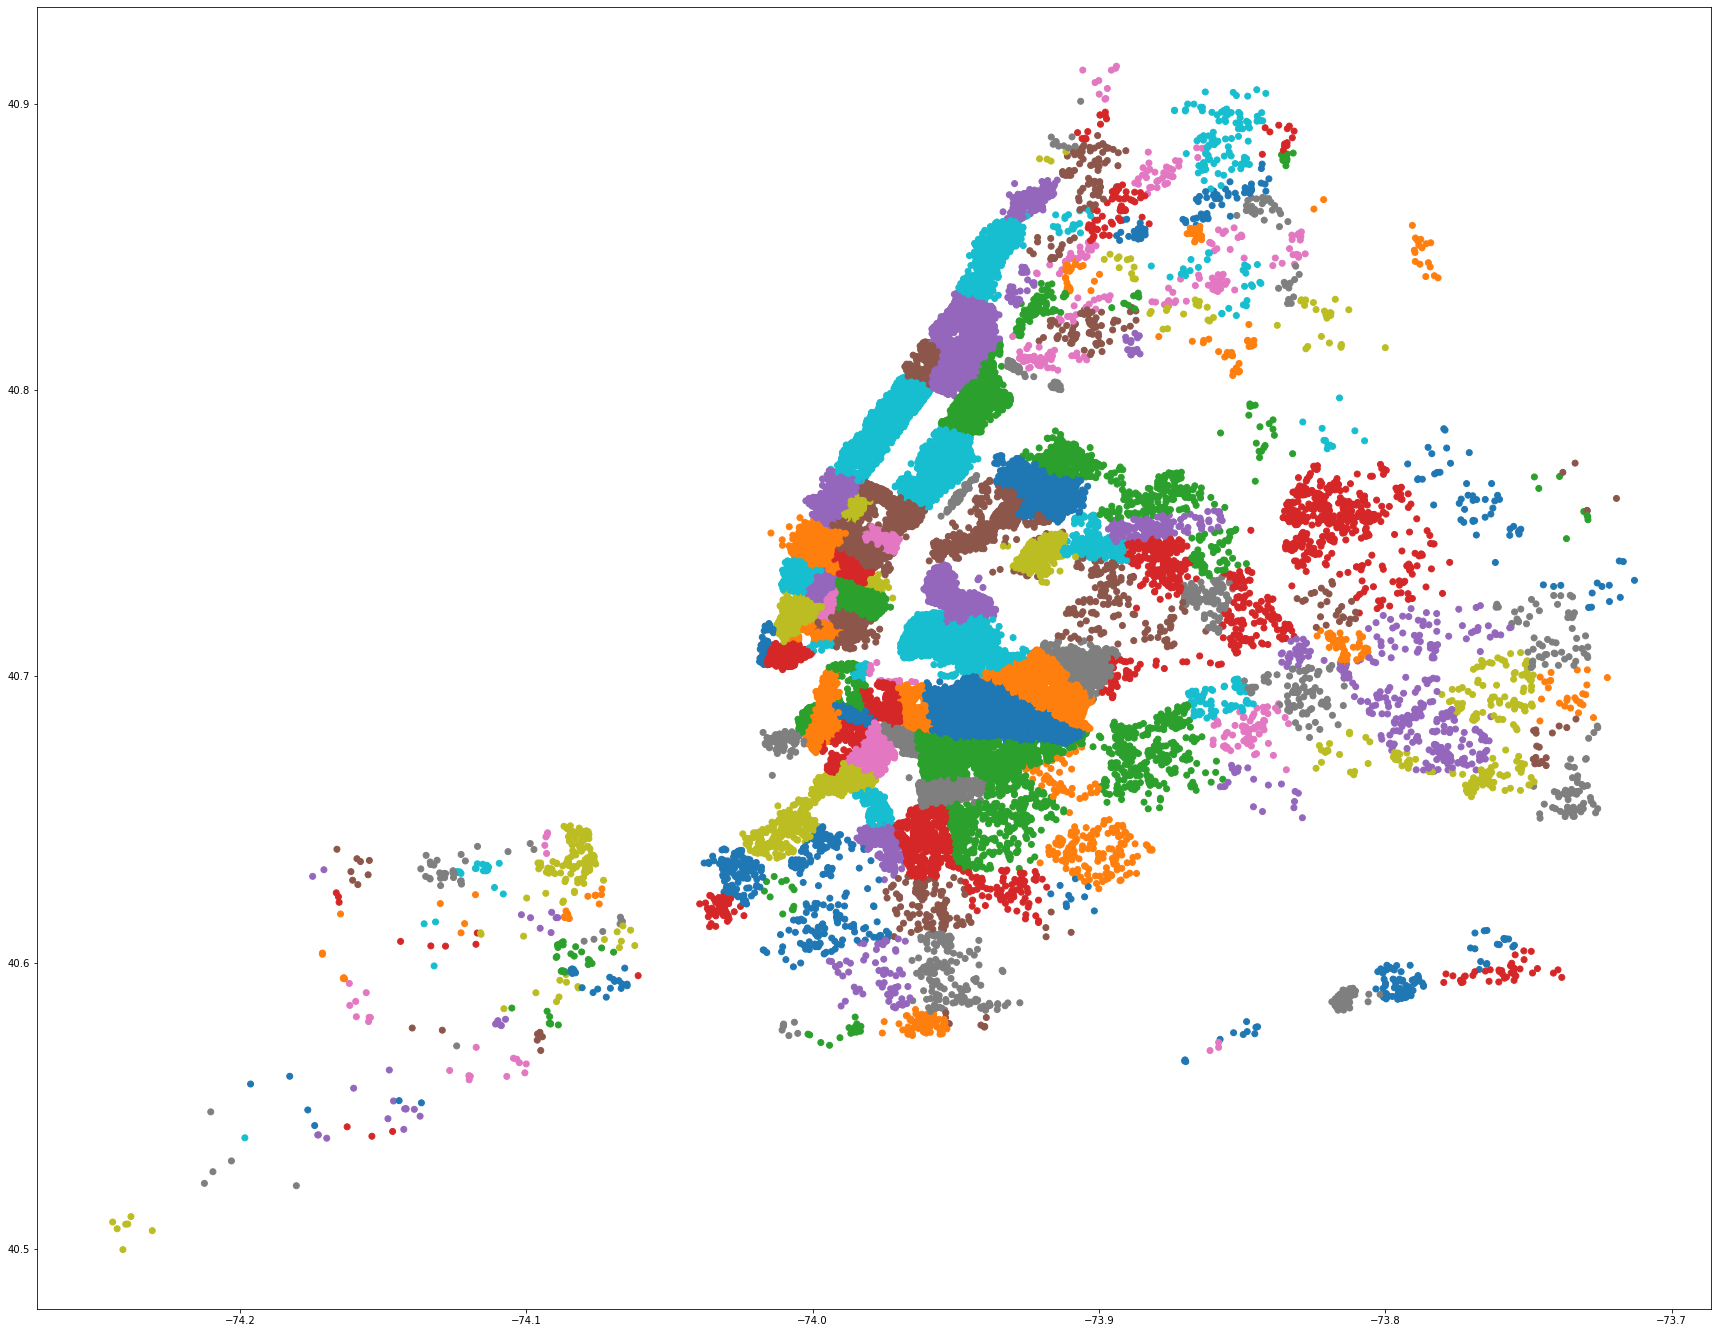

In [7]:
airbnb_ny_geodataset.plot("neighbourhood", figsize = (30,30))

In [8]:
#SOURCE: https://geopandas.org/gallery/plotting_basemap_background.html

#airbnb_ny_geodataset = airbnb_ny_geodataset.to_crs(epsg=3857)

df = gpd.read_file(gpd.datasets.get_path('nybb'))
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [9]:
df.crs

{'init': 'epsg:2263'}

In [10]:
df2 = df.to_crs("EPSG:4326")

In [11]:
df2.crs

'EPSG:4326'

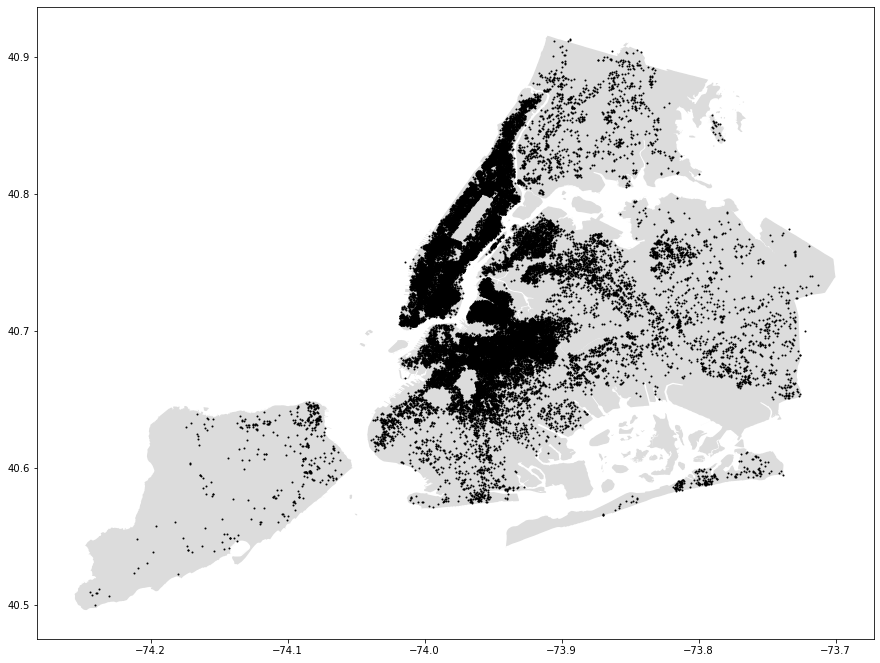

In [12]:
ax = df2.plot(color = 'gainsboro', legend = True)
airbnb_ny_geodataset.plot(ax=ax, color = 'black', markersize = 1)

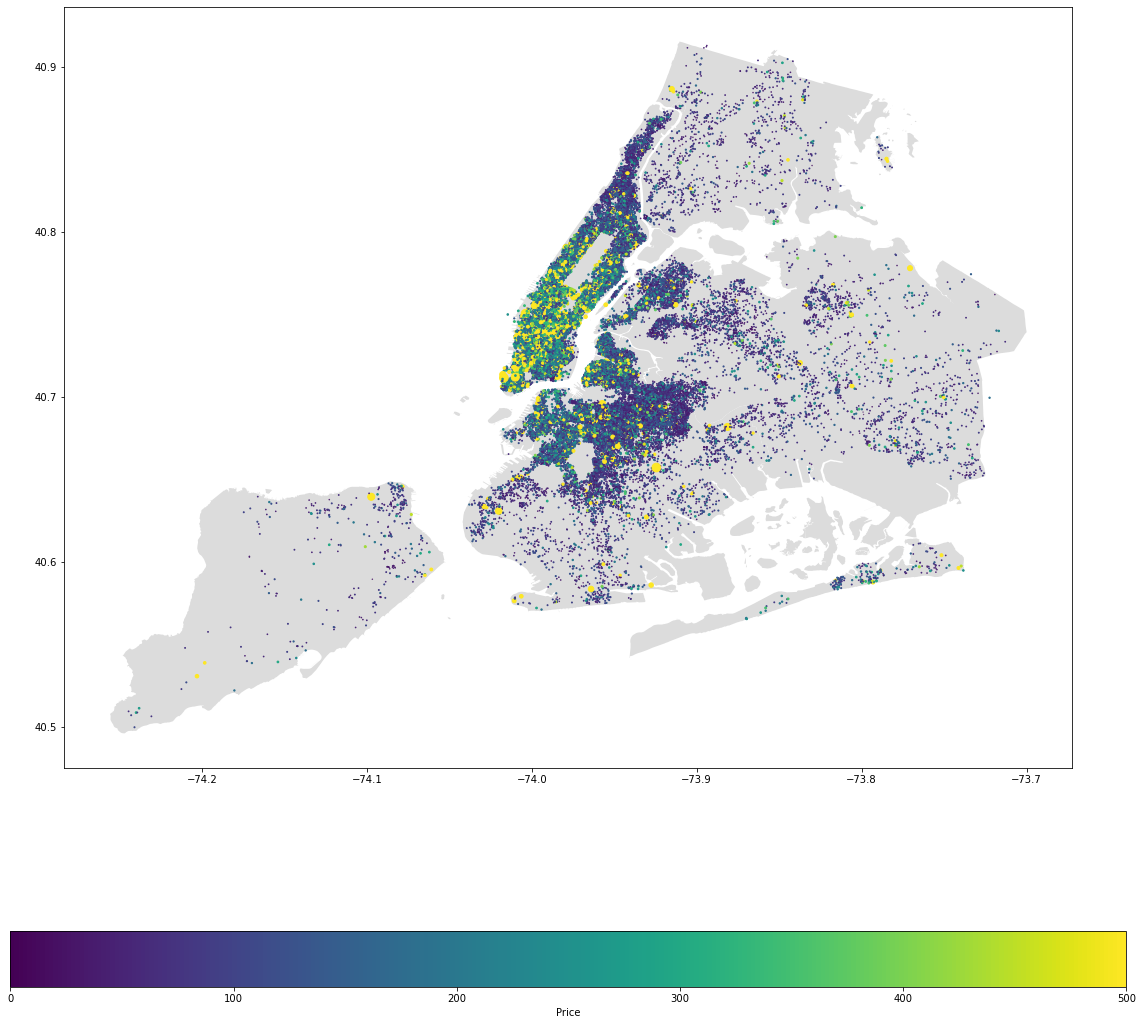

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
df2.plot(ax=ax,color = 'gainsboro')
airbnb_ny_geodataset.plot(column = "price", ax=ax, markersize = (airbnb_ny_geodataset["price"] / 100), vmax = 500, legend = True, legend_kwds = {'label': "Price", 'orientation': "horizontal"})

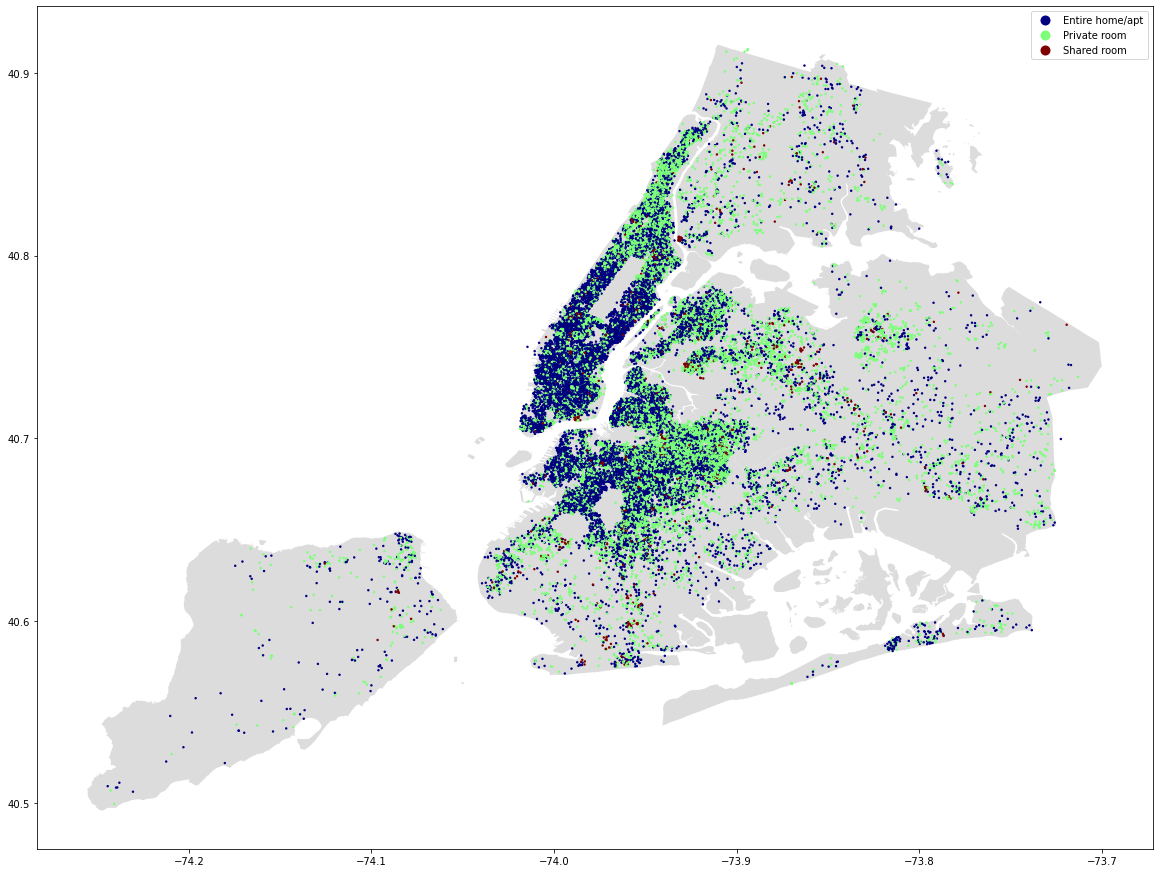

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
df2.plot(ax=ax, color = 'gainsboro')
airbnb_ny_geodataset.plot("room_type",ax=ax, cmap = 'jet', markersize=2, legend = True)


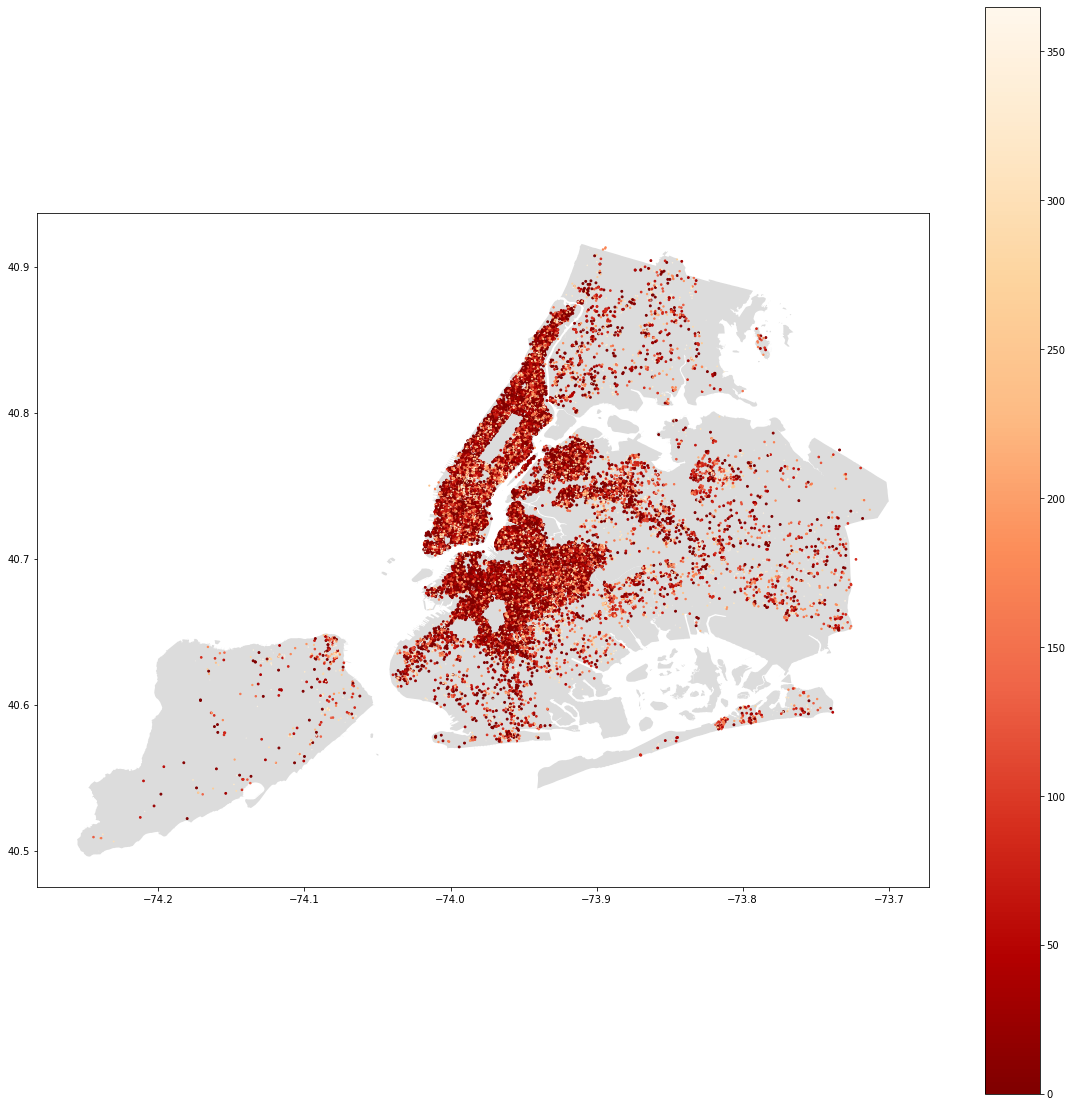

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
df2.plot(ax=ax,color = 'gainsboro', figsize = (60,60))
airbnb_ny_geodataset.plot("availability_365", ax = ax, cmap='OrRd_r', figsize = (60,60), markersize = (365 - airbnb_ny_geodataset["availability_365"])/100, legend = True)

pandas.core.series.Series

0          0
1         10
2          0
3        171
4        365
        ... 
48890    356
48891    329
48892    338
48893    363
48894    342
Name: availability_365, Length: 48895, dtype: int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,POINT (-73.94995 40.67853)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,POINT (-73.93317 40.70184)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,POINT (-73.94867 40.81475)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,POINT (-73.99112 40.75751)
